In [10]:
from qiskit import QuantumRegister,ClassicalRegister,QuantumCircuit, execute
from qiskit import Aer, IBMQ
from qiskit import tools
from qiskit.test import mock 
import qiskit
from qiskit.quantum_info.operators import Operator
from qiskit.compiler import transpile
from qiskit.visualization import plot_gate_map
from qiskit.providers.aer import noise
import scipy.linalg as linalg
import numpy as np
from scipy.linalg import expm
from numpy.linalg import svd
import csv as csv
from scipy.optimize import minimize
import numpy as np
import pandas as pd
import json
from scipy.linalg import expm
from numpy import pi as pi
import matplotlib.pyplot as plt
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import datetime 
import argparse
import random
from random import randint
from importlib import reload
import sys
# import gvar as gv
# import lsqfit
import pandas as pd
import json
from qiskit.quantum_info.operators.channel import Choi, Kraus
# IBMQ.load_account()

Create U and U-dagger gates with randomized Pauli twirling:

In [11]:
def pauli_ugate(qc):
    
    #U GATE
    qc.sxdg(1)
    qc.z(0)
    qc.s(1)
    
    #Pauli gate on 0 (bc)
    n = randint(0,3)
    if n == 0:
        qc.x(0)
    elif n == 1:
        qc.y(0)
    elif n == 2:
        qc.z(0)
    elif n == 3:
        pass
    
    #Pauli gate on 1 (bt)
    m = randint(0,3)
    if m ==0:
        qc.x(1)
    elif m == 1:
        qc.y(1)
    elif m == 2:
        qc.z(1)
    elif m == 3:
        pass
    
    #Pauli gate squared on 2
    o = randint(0,3)
    if o == 0:
        qc.x(2)
    elif o == 1:
        qc.y(2)
    elif o == 2:
        qc.z(2)
    elif o == 3:
        pass
    
    #CNOT
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    
    #Pauli complementary gate on 0, 1 (ac, at) 
    if n == 0 and m == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        #qc.id(1)
        
    if n == 0 and m == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(1)
        
    if n == 0 and m == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(1)
        
    if n == 0 and m == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(1)
        
    if n == 1 and m == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        #qc.id(1)
        
    if n == 1 and m == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(1)
        
    if n == 1 and m == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(1)
        
    if n == 1 and m == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(1)
        
    if n == 2 and m == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(1)
        
    if n == 2 and m == 1:     #if bc = z, bt = y, ac = id, at = y
        #qc.id(0)
        qc.y(1)
        
    if n == 2 and m == 2:     #if bc = z, bt = z, ac = id, at = z
        #qc.id(0)
        qc.z(1)
        
    if n == 2 and m == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        #qc.id(1)
        
    if n == 3 and m == 0:     #if bc = id, bt = x, ac = id, at = x
        #qc.id(0)
        qc.x(1)
        
    if n == 3 and m == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(1)
        
    if n == 3 and m == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(1)
        
    if n == 3 and m == 3:     #if bc = id, bt = id, ac = id, at = id
        pass
        #qc.id(0)
        #qc.id(1)      
            
    
    #Pauli gate squared on 2
    if o == 0:
        qc.x(2)
    if o == 1:
        qc.y(2)
    if o == 2:
        qc.z(2)
    if o == 3:
        pass
   

    #Sx gate  
    qc.sx(0)
    
        
    #Pauli gate on 0 (bc)
    w = randint(0,3)
    if w == 0:
        qc.x(0)
    elif w == 1:
        qc.y(0)
    elif w == 2:
        qc.z(0)
    elif w == 3:
        pass
    
    #Pauli gate on 2 (bt)
    x = randint(0,3)
    if x == 0:
        qc.x(2)
    elif x == 1:
        qc.y(2)
    elif x == 2:
        qc.z(2)
    elif x == 3:
        pass
        
    #Pauli gate squared on 1
    b = randint(0,3)
    if b == 0:
        qc.x(1)
    elif b == 1:
        qc.y(1)
    elif b == 2:
        qc.z(1)
    elif b == 3:
        pass

    
    #CNOT
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    
            
 #Pauli complementary gate on 0, 2 (ac, at) 
    if w == 0 and x == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        #qc.id(2)
        
    if w == 0 and x == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(2)
        
    if w == 0 and x == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(2)
        
    if w == 0 and x == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(2)
        
    if w == 1 and x == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        #qc.id(2)
        
    if w == 1 and x == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(2)
        
    if w == 1 and x == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(2)
        
    if w == 1 and x == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(2)
        
    if w == 2 and x == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(2)
        
    if w == 2 and x == 1:     #if bc = z, bt = y, ac = id, at = y
        #qc.id(0)
        qc.y(2)
        
    if w == 2 and x == 2:     #if bc = z, bt = z, ac = id, at = z
        #qc.id(0)
        qc.z(2)
        
    if w == 2 and x == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        #qc.id(2)
        
    if w == 3 and x == 0:     #if bc = id, bt = x, ac = id, at = x
        #qc.id(0)
        qc.x(2)
        
    if w == 3 and x == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(2)
        
    if w == 3 and x == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(2)
        
    if w == 3 and x == 3:     #if bc = id, bt = id, ac = id, at = id
        pass
        #qc.id(0)
        #qc.id(2)      
             
            
    #Pauli gate squared on 1
    if b == 0:
        qc.x(1)
    elif b == 1:
        qc.y(1)
    elif b == 2:
        qc.z(1)
    elif b == 3:
        pass
        
    #END OF FIRST U GATE
    
    return qc

In [12]:
def pauli_udagger(qc):
    
    #U DAGGER GATE
    
    #Pauli gate on 0 (bc)
    w = randint(0,3)
    if w == 0:
        qc.x(0)
    elif w == 1:
        qc.y(0)
    elif w == 2:
        qc.z(0)
    elif w == 3:
        pass
        
    #Pauli gate on 2 (bt)
    x = randint(0,3)
    if x == 0:
        qc.x(2)
    elif x == 1:
        qc.y(2)
    elif x == 2:
        qc.z(2)
    elif x == 3:
        pass
    
    #Pauli gate squared on 1
    b = randint(0,3)
    if b == 0:
        qc.x(1)
    elif b == 1:
        qc.y(1)
    elif b == 2:
        qc.z(1)
    elif b == 3:
        pass
    
    #CNOT
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    
    #Pauli complementary gate on 0, 2 (ac, at) 
    if w == 0 and x == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        #qc.id(2)
        
    if w == 0 and x == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(2)
        
    if w == 0 and x == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(2)
        
    if w == 0 and x == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(2)
        
    if w == 1 and x == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        #qc.id(2)
        
    if w == 1 and x == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(2)
        
    if w == 1 and x == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(2)
        
    if w == 1 and x == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(2)
        
    if w == 2 and x == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(2)
        
    if w == 2 and x == 1:     #if bc = z, bt = y, ac = id, at = y
        #qc.id(0)
        qc.y(2)
        
    if w == 2 and x == 2:     #if bc = z, bt = z, ac = id, at = z
        #qc.id(0)
        qc.z(2)
        
    if w == 2 and x == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        #qc.id(2)
        
    if w == 3 and x == 0:     #if bc = id, bt = x, ac = id, at = x
        #qc.id(0)
        qc.x(2)
        
    if w == 3 and x == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(2)
        
    if w == 3 and x == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(2)
        
    if w == 3 and x == 3:     #if bc = id, bt = id, ac = id, at = id
        pass
        #qc.id(0)
        #qc.id(2)      
                    
            
    #Pauli gate squared on 1
    if b == 0:
        qc.x(1)
    if b == 1:
        qc.y(1)
    if b == 2:
        qc.z(1)
    if b == 3:
        pass
        
    #Sx gate
    qc.sxdg(0)
    
    
    #Pauli gate on 0 (bc)
    n = randint(0,3)
    if n == 0:
        qc.x(0)
    elif n == 1:
        qc.y(0)
    elif n == 2:
        qc.z(0)
    elif n == 3:
        pass
    
    #Pauli gate on 1 (bt)
    m = randint(0,3)
    if m ==0:
        qc.x(1)
    elif m == 1:
        qc.y(1)
    elif m == 2:
        qc.z(1)
    elif m == 3:
        pass
    
    #Pauli gate squared on 2
    o = randint(0,3)
    if o == 0:
        qc.x(2)
    elif o == 1:
        qc.y(2)
    elif o == 2:
        qc.z(2)
    elif o == 3:
        pass
        
    #CNOT
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    
    #Pauli complementary gate on 0, 1 (ac, at) 
    if n == 0 and m == 0:    #if bc = x, bt = x, ac = x, at = id
        qc.x(0)
        #qc.id(1)
        
    if n == 0 and m == 1:      #if bc = x, bt = y, ac = y, at = z  
        qc.y(0)
        qc.z(1)
        
    if n == 0 and m == 2:     #if bc = x, bt = z, ac = y, at = y
        qc.y(0)
        qc.y(1)
        
    if n == 0 and m == 3:     #if bc = x, bt = id, ac = x, at = x
        qc.x(0)
        qc.x(1)
        
    if n == 1 and m == 0:     #if bc = y, bt = x, ac = y, at = id
        qc.y(0)
        #qc.id(1)
        
    if n == 1 and m == 1:     #if bc = y, bt = y, ac = x, at = z
        qc.x(0)
        qc.z(1)
        
    if n == 1 and m == 2:     #if bc = y, bt = z, ac = x, at = y
        qc.x(0)
        qc.y(1)
        
    if n == 1 and m == 3:     #if bc = y, bt = id, ac = y, at = x
        qc.y(0)
        qc.x(1)
        
    if n == 2 and m == 0:     #if bc = z, bt = x, ac = z, at = x
        qc.z(0)
        qc.x(1)
        
    if n == 2 and m == 1:     #if bc = z, bt = y, ac = id, at = y
        #qc.id(0)
        qc.y(1)
        
    if n == 2 and m == 2:     #if bc = z, bt = z, ac = id, at = z
        #qc.id(0)
        qc.z(1)
        
    if n == 2 and m == 3:     #if bc = z, bt = id, ac = z, at = id
        qc.z(0)
        #qc.id(1)
        
    if n == 3 and m == 0:     #if bc = id, bt = x, ac = id, at = x
        #qc.id(0)
        qc.x(1)
        
    if n == 3 and m == 1:     #if bc = id, bt = y, ac = z, at = y
        qc.z(0)
        qc.y(1)
        
    if n == 3 and m == 2:     #if bc = id, bt = z, ac = z, at = z
        qc.z(0)
        qc.z(1)
        
    if n == 3 and m == 3:     #if bc = id, bt = id, ac = id, at = id
        pass
        #qc.id(0)
        #qc.id(1)      
    
    #Pauli gate squared on 2
    if o == 0:
        qc.x(2)
    if o == 1:
        qc.y(2)
    if o == 2:
        qc.z(2)
    if o == 3:
        pass
        
        
    qc.z(0)
    qc.sdg(1)
    qc.sx(1)
    
    #END OF U DAGGER GATE
    
    return qc
    

Build and test twirled and non-twirled circuits, and create trotterization function:

In [13]:
def exact_circuit(qc, dt, eta):  #builds one exact circuit, no initializing state
    
    
    #Ugate
    qc.sxdg(1)
    qc.z(0)
    qc.s(1)
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    qc.sx(0)
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()

    #Rx
    qc.rx(-(dt*eta)/4,0)

    #Ry
    qc.ry(-(dt*eta)/4,2)

    #Udagger
    qc.barrier()
    qc.cx(0,2)
    qc.barrier()
    qc.sxdg(0)
    qc.barrier()
    qc.cx(0,1)
    qc.barrier()
    qc.z(0)
    qc.sdg(1)
    qc.sx(1)

    
    return qc
    

In [14]:
def twirled_circuit(qc, dt, eta):  #builds one twirled circuit, no initializing state
    

    qc = pauli_ugate(qc)

    qc.barrier()

    #Rx
    qc.rx(-(dt*eta)/4,0)

    #Ry
    qc.ry(-(dt*eta)/4,2)

    qc.barrier()

    qc = pauli_udagger(qc)

    
    return qc

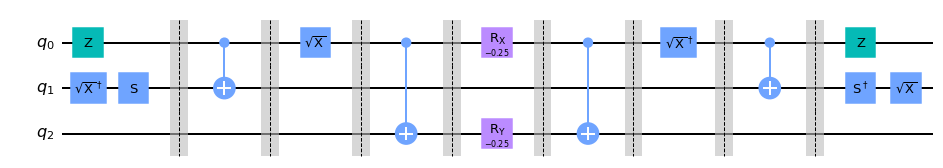

In [15]:
qctest = QuantumCircuit(3)
test = exact_circuit(qctest,1,1)
test.draw()

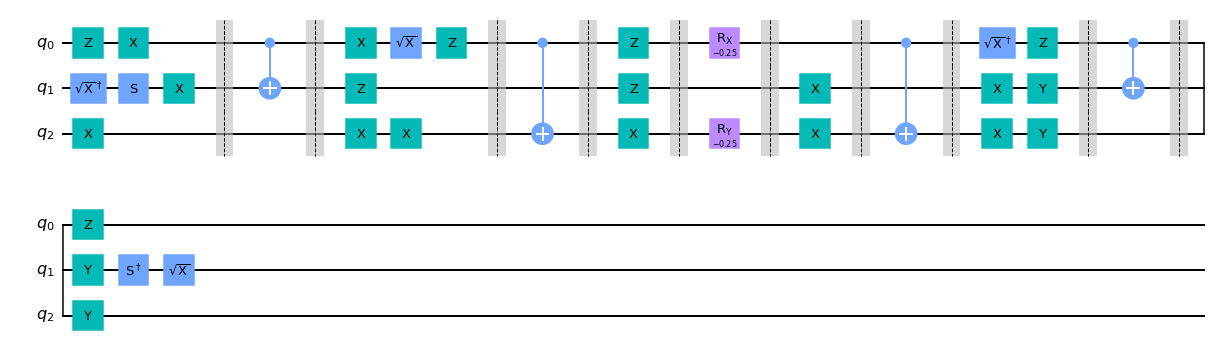

In [16]:
qctestt = QuantumCircuit(3)
testt = twirled_circuit(qctestt,1,1)
testt.draw()

In [8]:
#initialize state, add nstep number of (differently twirled) circuits, save density matrix
def trotter_twirled_sim(qc, ht, dt, nsteps):
    
    #qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = twirled_circuit(qc, dt, ht)
        qc.barrier
        
    qc.save_density_matrix()

    return qc


#initialize state, add nstep number of circuits, save density matrix
def trotter_exact_sim(qc, ht, dt, nsteps):  
    
    #qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = exact_circuit(qc, dt, ht)
        qc.barrier
        
    qc.save_density_matrix()

    return qc


#initialize state, add nstep number of (differently twirled) circuits, take measurement
def trotter_twirled_real(qc, ht, dt, nsteps):  
    
    #qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = twirled_circuit(qc, dt, ht)
        qc.barrier
        
    qc.measure_all()
    return qc


#initialize state, add nstep number of circuits, take measurement
def trotter_exact_real(qc, ht, dt, nsteps):  
    
    #qc.h(1)
    qc.x(0)
    
    for i in range(nsteps):
        
        qc = exact_circuit(qc, dt, ht)
        qc.barrier
        
    qc.measure_all()
    return qc
    

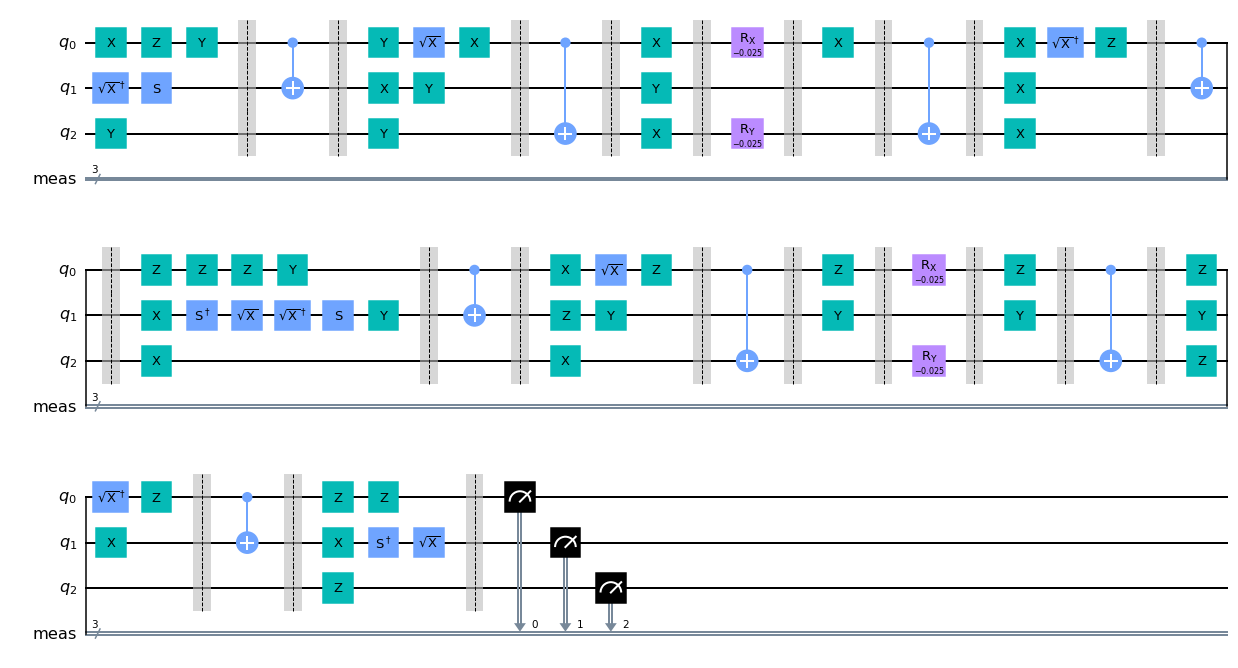

In [9]:
testqc = QuantumCircuit(3)
testht = 1
testdt = 0.1
testnsteps = 2

ex = trotter_twirled_real(testqc, testht, testdt, testnsteps)
ex.draw()

Run Aer Simulator for expected results:

In [17]:
backend = Aer.get_backend('aer_simulator_density_matrix')
c, s = np.cos(np.pi / 4), -1.0j * np.sin(np.pi / 4)
x_op = np.array([[0, 1], [1, 0]])
z_op = np.array([[1, 0], [0, -1]])
xi = 0.05
op1 = expm(-1.0j * np.pi / 4 * (np.kron(x_op, z_op) + xi * np.kron(z_op, np.identity(2))))
op2 = (c * np.identity(4) - s * np.kron(np.identity(2), z_op))
op3 = (c * np.identity(4) - s * np.kron(x_op, np.identity(2)))
cx = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])
op1 @ op2 @ op3 @ cx
noise_model = noise.NoiseModel()
noise_model.add_all_qubit_quantum_error(noise.coherent_unitary_error(op1 @ op2 @ op3 @ cx), 'cx')

In [19]:
def run_with_noise_model(circuits):
    backend=Aer.get_backend('aer_simulator_density_matrix')
    job = execute(circuits, backend=backend, optimization_level=0, noise_model=noise_model,
              basis_gates=['save_density_matrix', 'cx', 'h', 'rz', 'x', 'y', 'z', 'u', 'id'])
    #job_monitor(job, interval=1)
    return job

def run_without_noise_model(circuits):
    backend=Aer.get_backend('aer_simulator_density_matrix')
    job = execute(circuits, backend=backend, optimization_level=0,
              basis_gates=['save_density_matrix', 'cx', 'h', 'rz', 'x', 'y', 'z', 'u', 'id'])
    #job_monitor(job, interval=1)
    return job

In [32]:
#functions to simulate time evolution for twirled, untwirled (noisy), untwirled (exact)
#takes Z from each Trotter step - should be n_dt of them - n_qc amount of times
#takes average of the n_qc arrays to get average Z for each Trotter step

def time_evolution(dt, n_dt, n_qc, eta): 
    
    for i in range(n_qc):

        exact_circuits = []
        twirled_circuits = []

        for step in range(n_dt):
            
            #creating list of n_dt amount of trotter steps
            twirled_circuits.append(trotter_twirled_sim(QuantumCircuit(3), eta, dt, step+1))  
            exact_circuits.append(trotter_exact_sim(QuantumCircuit(3), eta, dt, step+1)) 

        job_exact = run_without_noise_model(exact_circuits)  #job will have n_dt results
        job_noise = run_with_noise_model(exact_circuits)
        job_twirled = run_with_noise_model(twirled_circuits)
        
    return job_exact, job_noise, job_twirled



def get_Z(jobs_list, n_dt, n_qc):
    
    Zs_exact = np.zeros((n_qc, n_dt))
    Zs_noise = np.zeros((n_qc, n_dt))
    Zs_twirl = np.zeros((n_qc, n_dt))
    
    for i in range(n_qc):

        for k in range(n_dt):

            #get Z for each trotter step
            density_exact = jobs_list[0].result().data(k)['density_matrix']
            z_exact = np.trace(density_exact @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Zs_exact[i,k] = z_exact  #put Z in the n_qc row, n_dt column of matrix

            density_noise = jobs_list[1].result().data(k)['density_matrix']
            z_noise = np.trace(density_noise @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Zs_noise[i,k] = z_noise

            density_twirled = jobs_list[2].result().data(k)['density_matrix']
            z_twirl = np.trace(density_twirled @ np.diag([1,1,1,1,-1,-1,-1,-1]))
            Zs_twirl[i,k] = z_twirl

    #averages down column of matrix which is Z from same trotter step, n_qc times
    Z_avg_exact = np.average(Zs_exact, axis=0)
    Z_avg_noise = np.average(Zs_noise, axis=0)
    Z_avg_twirl = np.average(Zs_twirl, axis=0)
    
    Zerr_twirl = np.sqrt((1-Z_avg_twirl**2)/shots)
    Zerr_noise = np.sqrt((1-Z_avg_noise**2)/shots)
    
    
    #Zerr_twirl = np.std(Zs_twirl, axis=0) #find STD down column
    #Zerr_twirl *= (1/np.sqrt(n_qc)) #normalize


    return Z_avg_exact, Z_avg_noise, Z_avg_twirl, Zerr_twirl, Zerr_noise




def get_Z1(jobs_list, n_dt, n_qc):
    
    Zs_exact = np.zeros((n_qc, n_dt))
    Zs_noise = np.zeros((n_qc, n_dt))
    Zs_twirl = np.zeros((n_qc, n_dt))
    
    for i in range(n_qc):

        for k in range(n_dt):

            #get Z for each trotter step
            density_exact = jobs_list[0].result().data(k)['density_matrix']
            z_exact = np.trace(density_exact @ np.diag([1,1,1,1,1,1,-1,-1]))
            Zs_exact[i,k] = z_exact  #put Z in the n_qc row, n_dt column of matrix

            density_noise = jobs_list[1].result().data(k)['density_matrix']
            z_noise = np.trace(density_noise @ np.diag([1,1,1,1,1,1,-1,-1]))
            Zs_noise[i,k] = z_noise

            density_twirled = jobs_list[2].result().data(k)['density_matrix']
            z_twirl = np.trace(density_twirled @ np.diag([1,1,1,1,1,1,-1,-1]))
            Zs_twirl[i,k] = z_twirl

    #averages down column of matrix which is Z from same trotter step, n_qc times
    Z_avg_exact = np.average(Zs_exact, axis=0)
    Z_avg_noise = np.average(Zs_noise, axis=0)
    Z_avg_twirl = np.average(Zs_twirl, axis=0)
    
    Zerr_twirl = np.sqrt((1-Z_avg_twirl**2)/shots)
    Zerr_noise = np.sqrt((1-Z_avg_noise**2)/shots)
    
    
    #Zerr_twirl = np.std(Zs_twirl, axis=0) #find STD down column
    #Zerr_twirl *= (1/np.sqrt(n_qc)) #normalize


    return Z_avg_exact, Z_avg_noise, Z_avg_twirl, Zerr_twirl, Zerr_noise




def get_Z2(jobs_list, n_dt, n_qc):
    
    Zs_exact = np.zeros((n_qc, n_dt))
    Zs_noise = np.zeros((n_qc, n_dt))
    Zs_twirl = np.zeros((n_qc, n_dt))
    
    for i in range(n_qc):

        for k in range(n_dt):

            #get Z for each trotter step
            density_exact = jobs_list[0].result().data(k)['density_matrix']
            z_exact = np.trace(density_exact @ np.diag([1,-1,1,-1,1,-1,1,-1]))
            Zs_exact[i,k] = z_exact  #put Z in the n_qc row, n_dt column of matrix

            density_noise = jobs_list[1].result().data(k)['density_matrix']
            z_noise = np.trace(density_noise @ np.diag([1,-1,1,-1,1,-1,1,-1]))
            Zs_noise[i,k] = z_noise

            density_twirled = jobs_list[2].result().data(k)['density_matrix']
            z_twirl = np.trace(density_twirled @ np.diag([1,-1,1,-1,1,-1,1,-1]))
            Zs_twirl[i,k] = z_twirl

    #averages down column of matrix which is Z from same trotter step, n_qc times
    Z_avg_exact = np.average(Zs_exact, axis=0)
    Z_avg_noise = np.average(Zs_noise, axis=0)
    Z_avg_twirl = np.average(Zs_twirl, axis=0)
    
    Zerr_twirl = np.sqrt((1-Z_avg_twirl**2)/shots)
    Zerr_noise = np.sqrt((1-Z_avg_noise**2)/shots)
    
    
    #Zerr_twirl = np.std(Zs_twirl, axis=0) #find STD down column
    #Zerr_twirl *= (1/np.sqrt(n_qc)) #normalize


    return Z_avg_exact, Z_avg_noise, Z_avg_twirl, Zerr_twirl, Zerr_noise
   

   

   

In [33]:
#set parameters

n_dt = 20
dt = 0.1
eta = 10
n_qc = 15
shots = 1024


In [35]:
#run noise model sim

sim_lists = time_evolution(dt, n_dt, n_qc, eta)
data = get_Z(sim_lists, n_dt, n_qc)   
#data list contains exact[0], noise[1], twirl[2], twirl err[3] 


/tmp/ipykernel_13090/1307565603.py:39: ComplexWarning: Casting complex values to real discards the imaginary part
  Zs_exact[i,k] = z_exact  #put Z in the n_qc row, n_dt column of matrix
/tmp/ipykernel_13090/1307565603.py:43: ComplexWarning: Casting complex values to real discards the imaginary part
  Zs_noise[i,k] = z_noise
/tmp/ipykernel_13090/1307565603.py:47: ComplexWarning: Casting complex values to real discards the imaginary part
  Zs_twirl[i,k] = z_twirl


Import counts from different times of day, same machine, and get Z values for each run:

In [46]:
import pickle

#midnight runs
pickle_rick = pickle.load(open('jakarta2.pkl', 'rb'))

rick1 = pickle.load(open('jakarta6.pkl', 'rb'))

rick2 = pickle.load(open('jakarta7.pkl', 'rb'))

rick3 = pickle.load(open('jakarta9.pkl', 'rb'))

#9am runs
rick4 = pickle.load(open('jakarta3.pkl', 'rb'))

rick5 = pickle.load(open('jakarta8.pkl', 'rb'))

rick6 = pickle.load(open('jakarta14.pkl', 'rb'))

rick7 = pickle.load(open('jakarta16.pkl', 'rb'))

#6pm runs
rick8 = pickle.load(open('jakarta4.pkl', 'rb'))

rick9 = pickle.load(open('jakarta11.pkl', 'rb'))

rick10 = pickle.load(open('jakarta12.pkl', 'rb'))

rick11 = pickle.load(open('jakarta17.pkl', 'rb'))

#9pm runs
rick12 = pickle.load(open('jakarta5.pkl', 'rb'))

rick13 = pickle.load(open('jakarta10.pkl', 'rb'))

rick14 = pickle.load(open('jakarta18.pkl', 'rb'))

rick15 = pickle.load(open('jakarta19.pkl', 'rb'))

In [37]:
def time_step_Z(results, n_qc, shots):
    #results are either jobs[0] or [1]
    #results will be list of length n_qc, each index being a list of length n_dt of dictionaries
    #each dictionary has 8 keys
    
    total_avgs = []
    
    for i in range(n_qc):
        
        step_avgs = []
        one_evolution = results[i]  #one evolution is n_dt amount of trotterized steps
        keys = ['110 000', '000 000', '100 000', '010 000', '001 000', '101 000', '111 000', '011 000']
        #key not present if count is zero; add key to keep array length consistent
        
        for j in range(len(one_evolution)):  #length n_dt
            counts_dict = one_evolution[j]  #each dictionary
            
            for k in range(len(keys)):
                if keys[k] not in counts_dict:
                    counts_dict[keys[k]] = 0 #add missing keys
            
            counts = list(counts_dict.values())  #list of 8 counts
            values = counts[::-1]
            state = np.diag(values) #creates diagonalized matrix with counts
            avg = (np.trace(state @ np.diag([1,1,1,1,-1,-1,-1,-1])))/shots #measurement Z on q0
            step_avgs.append(avg)  #adds avg to list of n_dt
         
        total_avgs.append(step_avgs)  #adds step_avgs list n_qc times        
        
    return total_avgs   #list of n_qc length, with each index another list of n_dt amt of values
        


def Z_avgs(avg_list, n_qc, n_dt, shots): 

    Zs = np.zeros((n_qc, n_dt))
    
    for i in range(n_qc):    
        one_evolution = avg_list[i]  #one evolution is list of one Z value for each trotter step
        
        for k in range(len(one_evolution)):  #length n_dt 
            Zs[i,k] = one_evolution[k]  #add each Z value to row of array for n_qc number of rows
                      
    Z = np.average(Zs, axis=0)  #average down column of array, which is all the Zs for one trotter step
    
    #Zerr = np.std(Zs, axis=0) #find STD down column
    #Zerr *= (1/np.sqrt(n_qc)) #normalize

    Zerr = np.sqrt((1-Z**2)/shots)

      
    return Z, Zerr

In [38]:
#get Z for each run


#midnight
#first plot
no_twirl_avgs = time_step_Z(pickle_rick[0], n_qc, shots)
no_twirl_Z = Z_avgs(no_twirl_avgs, n_qc, n_dt, shots)

twirled_avgs = time_step_Z(pickle_rick[1], n_qc, shots)
twirled_Z = Z_avgs(twirled_avgs, n_qc, n_dt, shots)

#second plot
no_twirl_rick1 = time_step_Z(rick1[0], n_qc, shots)
no_twirl_Z1 = Z_avgs(no_twirl_rick1, n_qc, n_dt, shots)

twirled_rick1 = time_step_Z(rick1[1], n_qc, shots)
twirled_Z1 = Z_avgs(twirled_rick1, n_qc, n_dt, shots)

#third plot
no_twirl_rick2 = time_step_Z(rick2[0], n_qc, shots)
no_twirl_Z2 = Z_avgs(no_twirl_rick2, n_qc, n_dt, shots)

twirled_rick2 = time_step_Z(rick2[1], n_qc, shots)
twirled_Z2 = Z_avgs(twirled_rick2, n_qc, n_dt, shots)

#fourth plot
no_twirl_rick3 = time_step_Z(rick3[0], n_qc, shots)
no_twirl_Z3 = Z_avgs(no_twirl_rick3, n_qc, n_dt, shots)

twirled_rick3 = time_step_Z(rick3[1], n_qc, shots)
twirled_Z3 = Z_avgs(twirled_rick3, n_qc, n_dt, shots)


#9am
#fifth plot
no_twirl_rick4 = time_step_Z(rick4[0], n_qc, shots)
no_twirl_Z4 = Z_avgs(no_twirl_rick4, n_qc, n_dt, shots)

twirled_rick4 = time_step_Z(rick4[1], n_qc, shots)
twirled_Z4 = Z_avgs(twirled_rick4, n_qc, n_dt, shots)

#sixth plot
no_twirl_rick5 = time_step_Z(rick5[0], n_qc, shots)
no_twirl_Z5 = Z_avgs(no_twirl_rick5, n_qc, n_dt, shots)

twirled_rick5 = time_step_Z(rick5[1], n_qc, shots)
twirled_Z5 = Z_avgs(twirled_rick5, n_qc, n_dt, shots)

#seventh plot
no_twirl_rick6 = time_step_Z(rick6[0], n_qc, shots)
no_twirl_Z6 = Z_avgs(no_twirl_rick6, n_qc, n_dt, shots)

twirled_rick6 = time_step_Z(rick6[1], n_qc, shots)
twirled_Z6 = Z_avgs(twirled_rick6, n_qc, n_dt, shots)

#eighth plot
no_twirl_rick7 = time_step_Z(rick7[0], n_qc, shots)
no_twirl_Z7 = Z_avgs(no_twirl_rick5, n_qc, n_dt, shots)

twirled_rick7 = time_step_Z(rick7[1], n_qc, shots)
twirled_Z7 = Z_avgs(twirled_rick7, n_qc, n_dt, shots)


#6pm
#ninth plot
no_twirl_rick8 = time_step_Z(rick8[0], n_qc, shots)
no_twirl_Z8 = Z_avgs(no_twirl_rick8, n_qc, n_dt, shots)

twirled_rick8 = time_step_Z(rick8[1], n_qc, shots)
twirled_Z8 = Z_avgs(twirled_rick8, n_qc, n_dt, shots)

#tenth plot
no_twirl_rick9 = time_step_Z(rick9[0], n_qc, shots)
no_twirl_Z9 = Z_avgs(no_twirl_rick9, n_qc, n_dt, shots)

twirled_rick9 = time_step_Z(rick9[1], n_qc, shots)
twirled_Z9 = Z_avgs(twirled_rick9, n_qc, n_dt, shots)

#eleventh plot
no_twirl_rick10 = time_step_Z(rick10[0], n_qc, shots)
no_twirl_Z10 = Z_avgs(no_twirl_rick10, n_qc, n_dt, shots)

twirled_rick10 = time_step_Z(rick10[1], n_qc, shots)
twirled_Z10 = Z_avgs(twirled_rick10, n_qc, n_dt, shots)

#twelveth plot
no_twirl_rick11 = time_step_Z(rick11[0], n_qc, shots)
no_twirl_Z11 = Z_avgs(no_twirl_rick11, n_qc, n_dt, shots)

twirled_rick11 = time_step_Z(rick11[1], n_qc, shots)
twirled_Z11 = Z_avgs(twirled_rick11, n_qc, n_dt, shots)


#9pm
#thirteenth plot
no_twirl_rick12 = time_step_Z(rick12[0], n_qc, shots)
no_twirl_Z12 = Z_avgs(no_twirl_rick12, n_qc, n_dt, shots)

twirled_rick12 = time_step_Z(rick12[1], n_qc, shots)
twirled_Z12 = Z_avgs(twirled_rick12, n_qc, n_dt, shots)

#fourteenth plot
no_twirl_rick13 = time_step_Z(rick13[0], n_qc, shots)
no_twirl_Z13 = Z_avgs(no_twirl_rick13, n_qc, n_dt, shots)

twirled_rick13 = time_step_Z(rick13[1], n_qc, shots)
twirled_Z13 = Z_avgs(twirled_rick13, n_qc, n_dt, shots)

#fifteenth plot
no_twirl_rick14 = time_step_Z(rick14[0], n_qc, shots)
no_twirl_Z14 = Z_avgs(no_twirl_rick14, n_qc, n_dt, shots)

twirled_rick14 = time_step_Z(rick14[1], n_qc, shots)
twirled_Z14 = Z_avgs(twirled_rick14, n_qc, n_dt, shots)

#sisteenth plot
no_twirl_rick15 = time_step_Z(rick15[0], n_qc, shots)
no_twirl_Z15 = Z_avgs(no_twirl_rick15, n_qc, n_dt, shots)

twirled_rick15 = time_step_Z(rick15[1], n_qc, shots)
twirled_Z15 = Z_avgs(twirled_rick15, n_qc, n_dt, shots)


For each specific time, average the Z values from each day:

In [39]:
def avg_days(list_of_Zs, list_of_Zerrs, n_dt):
    
    days = len(list_of_Zs)
    Z_avg_days = np.zeros((days, n_dt))
    
    for i in range(days):
        
        for j in range(n_dt):
            
            Z_avg_days[i,j]=list_of_Zs[i][j]
            
    avg_time_Z = np.average(Z_avg_days, axis=0)
    
    
    #error on avg_time_Z elements is sqrt(error1^2+error2^2+error3^2...)       

    avg_time_Z_err = []  
    for p in range(n_dt):
        
        add = 0.0
        
        for o in range(days):
            
            add += list_of_Zerrs[o][p]**2
            
        avg_time_Z_err.append(np.sqrt(add))
        
    
    
    return avg_time_Z, avg_time_Z_err
        
    
            
            

In [43]:
#twirled averages

midnight = [twirled_Z[0], twirled_Z1[0], twirled_Z2[0], twirled_Z3[0]] #create list of lists of Z values
midnight_err = [twirled_Z[1], twirled_Z1[1], twirled_Z2[1], twirled_Z3[1]] #create list of lists of corresponding errors
midnight_avg = avg_days(midnight, midnight_err, n_dt) #input lists, get average Z and Zerr lists for this time

morning = [twirled_Z4[0], twirled_Z5[0], twirled_Z6[0], twirled_Z7[0]]
morning_err = [twirled_Z4[1], twirled_Z5[1], twirled_Z6[1], twirled_Z7[1]]
morning_avg = avg_days(morning, morning_err, n_dt)

afternoon = [twirled_Z8[0], twirled_Z9[0], twirled_Z10[0], twirled_Z11[0]]
afternoon_err = [twirled_Z8[1], twirled_Z9[1], twirled_Z10[1], twirled_Z11[1]]
afternoon_avg = avg_days(afternoon, afternoon_err, n_dt)

evening = [twirled_Z12[0], twirled_Z13[0], twirled_Z14[0], twirled_Z15[0]]
evening_err = [twirled_Z12[1], twirled_Z13[1], twirled_Z14[1], twirled_Z15[1]]
evening_avg = avg_days(evening, evening_err, n_dt)

print(midnight_avg)

(array([ 0.6469401 ,  0.34615885,  0.05615234, -0.1944987 , -0.37604167,
       -0.44361979, -0.41647135, -0.32376302, -0.2156901 , -0.03144531,
        0.09475911,  0.20048828,  0.20270182,  0.16067708,  0.09726562,
        0.03089193, -0.04713542, -0.10078125, -0.14082031, -0.1445638 ]), [0.04760532889696834, 0.05862996006831998, 0.06236496975071087, 0.061261273182485185, 0.05787112210809805, 0.05594838659808495, 0.05681149225398517, 0.05907355381700449, 0.06100466387842923, 0.06244612331959807, 0.06219017469808581, 0.06122036123262269, 0.06119197424316442, 0.06168140161231754, 0.06216160106602595, 0.06246547897970401, 0.06242362601219833, 0.06216491385972603, 0.061860986711135, 0.06183974281052034])


In [44]:
#non-twirled averages

midnight_nt = [no_twirl_Z[0], no_twirl_Z1[0], no_twirl_Z2[0], no_twirl_Z3[0]]
midnight_err_nt = [no_twirl_Z[1], no_twirl_Z1[1], no_twirl_Z2[1], no_twirl_Z3[1]]
midnight_avg_nt = avg_days(midnight_nt, midnight_err_nt, n_dt)

morning_nt = [no_twirl_Z4[0], no_twirl_Z5[0], no_twirl_Z6[0], no_twirl_Z7[0]]
morning_err_nt = [no_twirl_Z4[1], no_twirl_Z5[1], no_twirl_Z6[1], no_twirl_Z7[1]]
morning_avg_nt = avg_days(morning_nt, morning_err_nt, n_dt)

afternoon_nt = [no_twirl_Z8[0], no_twirl_Z9[0], no_twirl_Z10[0], no_twirl_Z11[0]]
afternoon_err_nt = [no_twirl_Z8[1], no_twirl_Z9[1], no_twirl_Z10[1], no_twirl_Z11[1]]
afternoon_avg_nt = avg_days(afternoon_nt, afternoon_err_nt, n_dt)

evening_nt = [no_twirl_Z12[0], no_twirl_Z13[0], no_twirl_Z14[0], no_twirl_Z15[0]]
evening_err_nt = [no_twirl_Z12[1], no_twirl_Z13[1], no_twirl_Z14[1], no_twirl_Z15[1]]
evening_avg_nt = avg_days(evening_nt, evening_err_nt, n_dt)

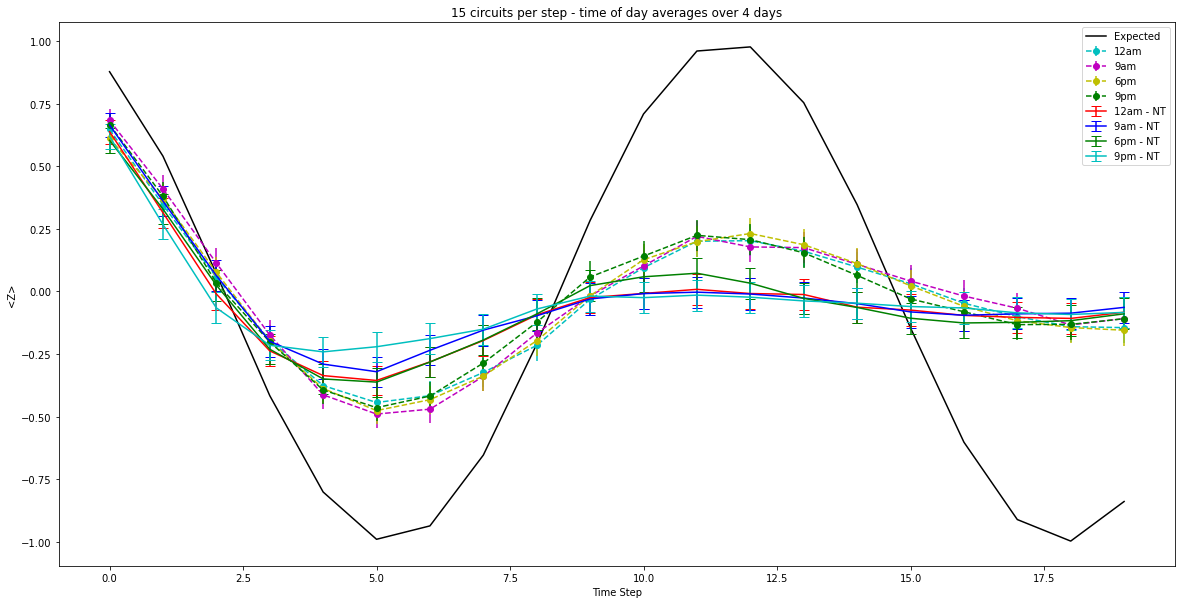

In [45]:
time = []
for i in range(n_dt):
    time.append(i)
    
plt.rcParams["figure.figsize"] = [20, 10]
    
plt.plot(time, data[0], 'k-')
plt.errorbar(time, midnight_avg[0], fmt='co--', yerr=midnight_avg[1])
plt.errorbar(time, morning_avg[0], fmt='mo--', yerr=morning_avg[1])
plt.errorbar(time, afternoon_avg[0], fmt='yo--', yerr=afternoon_avg[1])
plt.errorbar(time, evening_avg[0], fmt='go--', yerr=evening_avg[1])

#no twirling
plt.errorbar(time, midnight_avg_nt[0], fmt='r-', yerr=midnight_avg_nt[1], capsize=5)
plt.errorbar(time, morning_avg_nt[0], fmt='b-', yerr=morning_avg_nt[1], capsize=5)
plt.errorbar(time, afternoon_avg_nt[0], fmt='g-', yerr=afternoon_avg_nt[1], capsize=5)
plt.errorbar(time, evening_avg_nt[0], fmt='c-', yerr=evening_avg_nt[1], capsize=5)

plt.xlabel("Time Step")
plt.ylabel("<Z>")
plt.title("15 circuits per step - time of day averages over 4 days")
plt.legend(['Expected','12am','9am','6pm','9pm', '12am - NT', '9am - NT', '6pm - NT', '9pm - NT'], loc='best')
plt.show()
    

Compare data across different machines at the same time of day:

In [47]:
#midnight runs

casa = pickle.load(open('casablanca3.pkl', 'rb'))

perth = pickle.load(open('perth2.pkl', 'rb'))

lagos = pickle.load(open('lagos2.pkl', 'rb'))

jakarta = pickle.load(open('jakarta2.pkl', 'rb'))

bogota = pickle.load(open('bogota2.pkl', 'rb'))


In [48]:
#first plot
nt_casa = time_step_Z(casa[0], n_qc, shots)
casa_nt_Z = Z_avgs(nt_casa, n_qc, n_dt, shots)

t_casa = time_step_Z(casa[1], n_qc, shots)
casa_Z = Z_avgs(t_casa, n_qc, n_dt, shots)

#second plot
nt_perth = time_step_Z(perth[0], n_qc, shots)
perth_nt_Z = Z_avgs(nt_perth, n_qc, n_dt, shots)

t_perth = time_step_Z(perth[1], n_qc, shots)
perth_Z = Z_avgs(t_perth, n_qc, n_dt, shots)

#third plot
nt_lagos = time_step_Z(lagos[0], n_qc, shots)
lagos_nt_Z = Z_avgs(nt_lagos, n_qc, n_dt, shots)

t_lagos = time_step_Z(lagos[1], n_qc, shots)
lagos_Z = Z_avgs(t_lagos, n_qc, n_dt, shots)

#fourth plot
nt_jakarta = time_step_Z(jakarta[0], n_qc, shots)
jakarta_nt_Z = Z_avgs(nt_jakarta, n_qc, n_dt, shots)

t_jakarta = time_step_Z(jakarta[1], n_qc, shots)
jakarta_Z = Z_avgs(t_jakarta, n_qc, n_dt, shots)

#first plot
nt_bogota = time_step_Z(bogota[0], n_qc, shots)
bogota_nt_Z = Z_avgs(nt_bogota, n_qc, n_dt, shots)

t_bogota = time_step_Z(bogota[1], n_qc, shots)
bogota_Z = Z_avgs(t_bogota, n_qc, n_dt, shots)



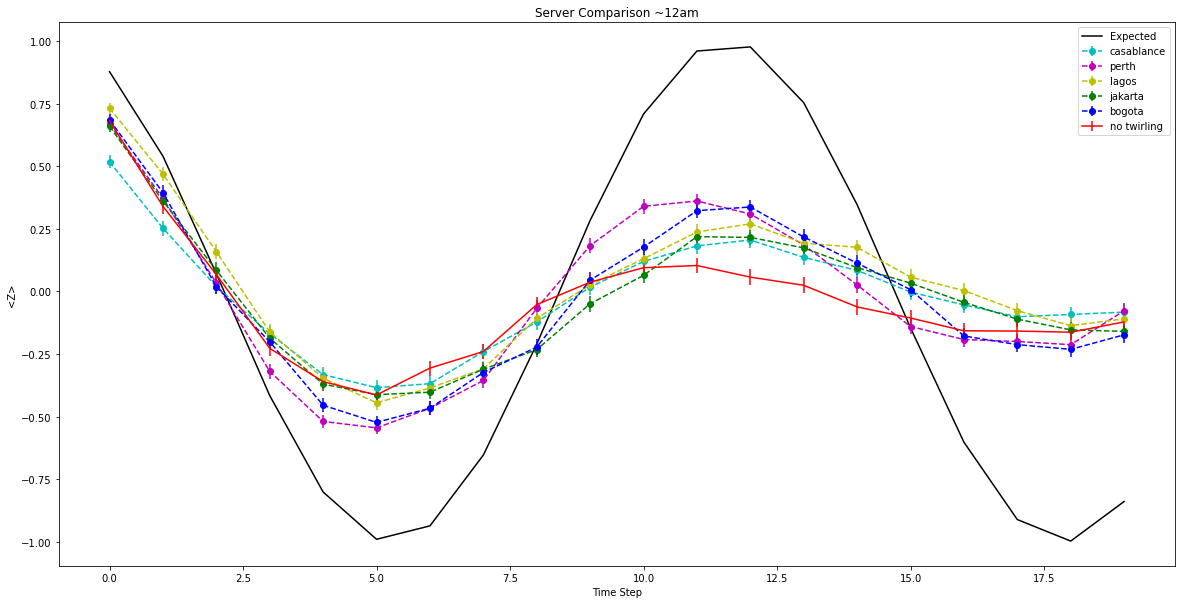

In [49]:
#visualization

time = []
for i in range(n_dt):
    time.append(i)
    
plt.rcParams["figure.figsize"] = [20, 10]
    
plt.plot(time, data[0], 'k-', label='Expected')
#plt.errorbar(time, no_twirl_Z[0], fmt='co--', yerr=no_twirl_Z[1])
plt.errorbar(time, casa_Z[0], fmt='co--', label='casablance', yerr=casa_Z[1])
plt.errorbar(time, perth_Z[0], fmt='mo--', label='perth', yerr=perth_Z[1])
plt.errorbar(time, lagos_Z[0], fmt='yo--', label='lagos', yerr=lagos_Z[1])
plt.errorbar(time, jakarta_Z[0], fmt='go--', label='jakarta', yerr=jakarta_Z[1])
plt.errorbar(time, bogota_Z[0], fmt='bo--', label='bogota', yerr=bogota_Z[1])
plt.errorbar(time, jakarta_nt_Z[0], fmt='r-', label='no twirling', yerr=jakarta_nt_Z[1])

plt.xlabel("Time Step")
plt.ylabel("<Z>")
plt.title("Server Comparison ~12am")
plt.legend(loc='best')
plt.show()
    

    

Comparing jakarta runs individually over different times of day:

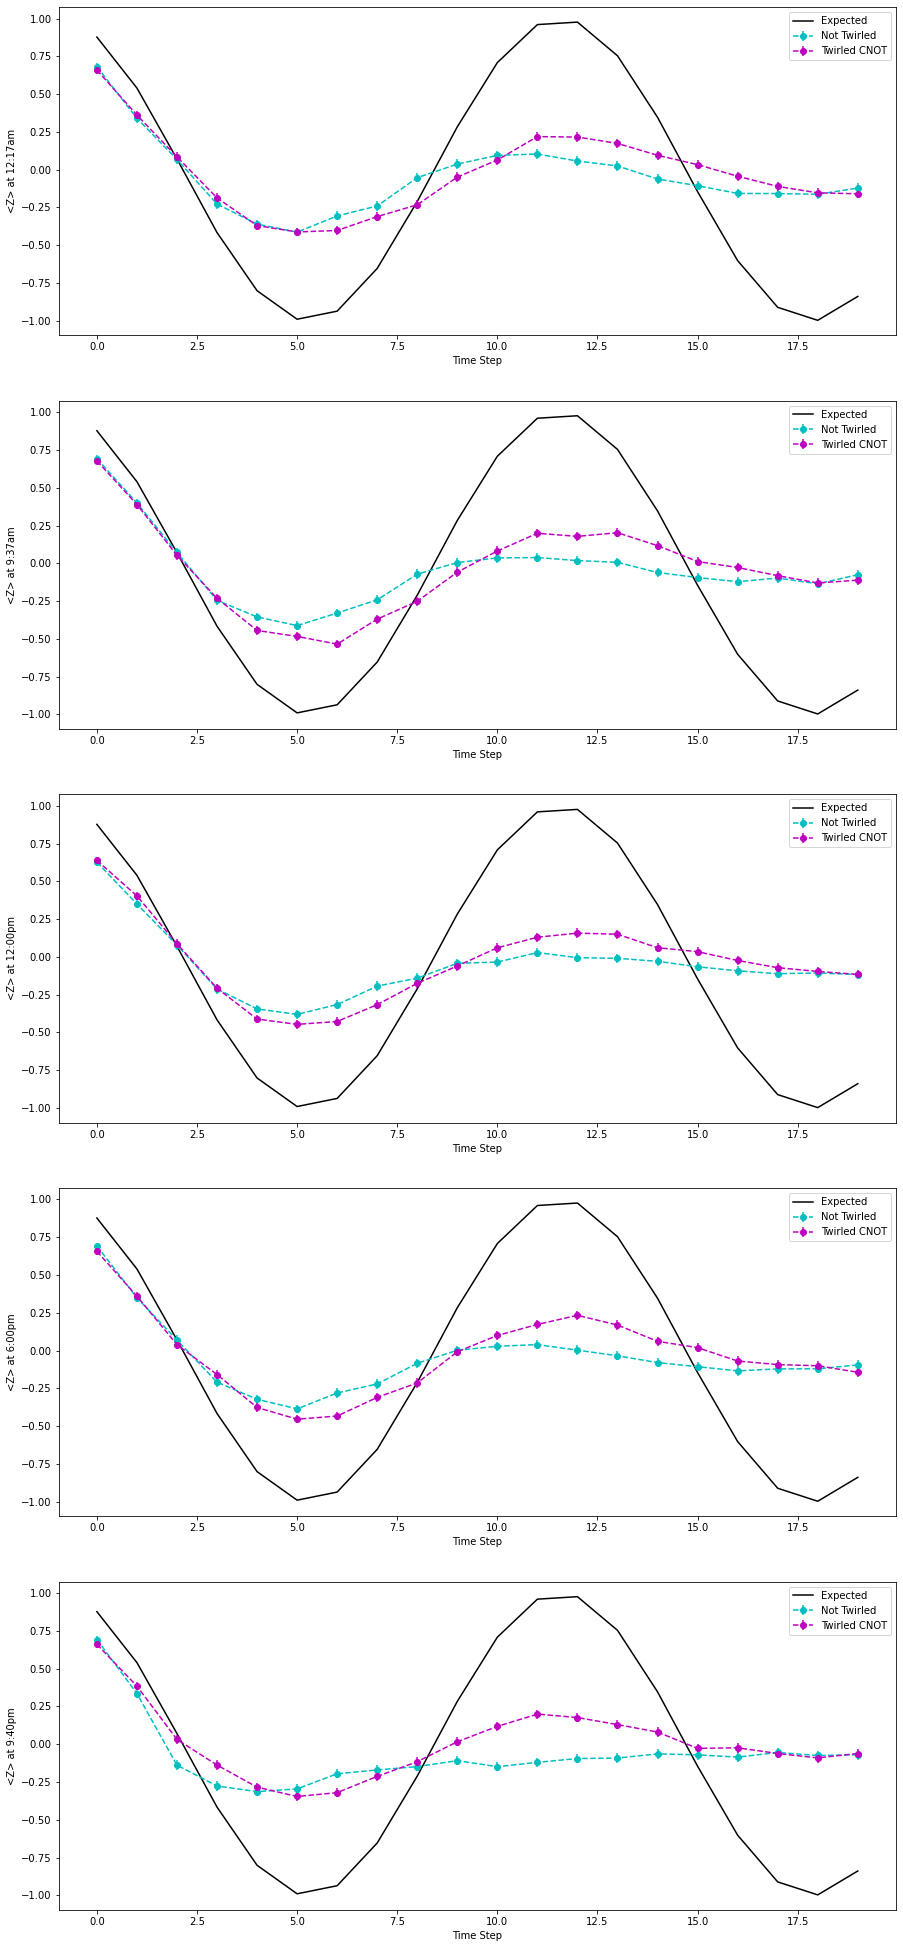

In [52]:
#1217am = jakarta2
#937am = jakarta3
#6pm = jakarta4
#940pm = jakarta5

#add run at noon:
jakarta12 = pickle.load(open('jakarta13.pkl', 'rb'))

nt_jakarta12 = time_step_Z(jakarta12[0], n_qc, shots)
jakarta12_nt_Z = Z_avgs(nt_jakarta12, n_qc, n_dt, shots)

t_jakarta12 = time_step_Z(jakarta12[1], n_qc, shots)
jakarta12_Z = Z_avgs(t_jakarta12, n_qc, n_dt, shots)


#visualization
plt.rcParams["figure.figsize"] = [15, 35]
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1)

ax1.plot(time, data[0], 'k-')
ax1.errorbar(time, no_twirl_Z[0], fmt='co--', yerr=no_twirl_Z[1])
ax1.errorbar(time, twirled_Z[0], fmt='mo--', yerr=twirled_Z[1])
ax1.set_xlabel('Time Step')
ax1.set_ylabel('<Z> at 12:17am')
ax1.legend(['Expected', 'Not Twirled', 'Twirled CNOT'], loc='best')


ax2.plot(time, data[0], 'k-')
ax2.errorbar(time, no_twirl_Z4[0], fmt='co--', yerr=no_twirl_Z4[1])
ax2.errorbar(time, twirled_Z4[0], fmt='mo--', yerr=twirled_Z4[1])
ax2.set_xlabel('Time Step')
ax2.set_ylabel('<Z> at 9:37am')
ax2.legend(['Expected', 'Not Twirled', 'Twirled CNOT'], loc='best')


ax3.plot(time, data[0], 'k-')
ax3.errorbar(time, jakarta12_nt_Z[0], fmt='co--', yerr=jakarta12_nt_Z[1])
ax3.errorbar(time, jakarta12_Z[0], fmt='mo--', yerr=jakarta12_Z[1])
ax3.set_xlabel('Time Step')
ax3.set_ylabel('<Z> at 12:00pm')
ax3.legend(['Expected', 'Not Twirled', 'Twirled CNOT'], loc='best')
 
    
ax4.plot(time, data[0], 'k-')
ax4.errorbar(time, no_twirl_Z8[0], fmt='co--', yerr=no_twirl_Z8[1])
ax4.errorbar(time, twirled_Z8[0], fmt='mo--', yerr=twirled_Z8[1])
ax4.set_xlabel('Time Step')
ax4.set_ylabel('<Z> at 6:00pm')
ax4.legend(['Expected', 'Not Twirled', 'Twirled CNOT'], loc='best')

               
ax5.plot(time, data[0], 'k-')
ax5.errorbar(time, no_twirl_Z12[0], fmt='co--', yerr=no_twirl_Z12[1])
ax5.errorbar(time, twirled_Z12[0], fmt='mo--', yerr=twirled_Z12[1])
ax5.set_xlabel('Time Step')
ax5.set_ylabel('<Z> at 9:40pm')
ax5.legend(['Expected', 'Not Twirled', 'Twirled CNOT'], loc='best')



In [ ]:
#old alternative code below